In [1]:
import pandas as pd 

df = pd.read_excel("filmturk.xlsx")

df.head()

,Film,Tur,Yonetmen,Yazar,Hasilat,IMDB
0,Kolpaçino: 4 4'lük,Komedi,Kamil Çetin,Safak Sezer,$7.343.114,2.8
1,Rafadan Tayfa: Hayrimatör,Animasyon,İsmail Fidan,Arzu Yurtseven,"$8,824,101",5.4
2,Lohusa,Komedi,Kivanç Baruönü,Gupse Özay,"$8,809,952",5.3
3,3391 Kilometre,Romantik,Deniz Enyüksek,Fulya Özcan,"$3,424,225",4.2
4,Siccin,Korku,Alper Mestçi,Alper Mestçi,"$2,975,473",4.2


In [2]:
# Pandas kütüphanesini içe aktarıyoruz
# Excel dosyasını oku
# İlk 5 satırı görüntüle

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Film      82 non-null     object 
 1   Tur       82 non-null     object 
 2   Yonetmen  82 non-null     object 
 3   Yazar     82 non-null     object 
 4   Hasilat   82 non-null     object 
 5   IMDB      82 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.0+ KB


In [5]:
df["Hasilat"] = df["Hasilat"].astype(str)  
df["Hasilat"] = df["Hasilat"].str.replace(r"[\$,]", "", regex=True)  
df["Hasilat"] = pd.to_numeric(df["Hasilat"], errors="coerce") 

print(df["Hasilat"].dtype) 
print(df["Hasilat"].head(10))  

float64
0          NaN
1    8824101.0
2    8809952.0
3    3424225.0
4    2975473.0
5    2268769.0
6    2563443.0
7    1727388.0
8    1650782.0
9    1865185.0
Name: Hasilat, dtype: float64


In [8]:
if not df["Hasilat"].isnull().all(): 
    en_cok_kazanan = df.loc[df["Hasilat"].idxmax()]
    print(f"En çok kazanan film: {en_cok_kazanan['Film']} - {en_cok_kazanan['Hasilat']} $")
else:
    print("Tüm 'Hasılat' değerleri eksik veya hatalı, işlem yapılamıyor.")


En çok kazanan film: Rafadan Tayfa: Hayrimatör - 8824101.0 $


In [11]:
print(df.describe())

ortalama_imdb = df["IMDB"].mean()
print(f"Ortalama IMDb Puanı: {ortalama_imdb:.2f}")

en_cok_kazanan = df.loc[df["Hasilat"].idxmax()]
print(f"En çok kazanan film: {en_cok_kazanan['Film']} - {en_cok_kazanan['Hasilat']} $")


            Hasilat       IMDB
count  8.100000e+01  82.000000
mean   6.599456e+05   4.896341
std    1.484897e+06   1.928439
min    0.000000e+00   0.000000
25%    5.323800e+04   3.625000
50%    1.191680e+05   4.850000
75%    4.747360e+05   6.475000
max    8.824101e+06   8.900000
Ortalama IMDb Puanı: 4.90
En çok kazanan film: Rafadan Tayfa: Hayrimatör - 8824101.0 $


In [13]:
en_yuksek_puan = df.loc[df["IMDB"].idxmax()]
print(f"En Yüksek Puanlı Film: {en_yuksek_puan['Film']} - {en_yuksek_puan['IMDB']} ")


En Yüksek Puanlı Film: Üç Günlük Dünya - 8.9 


In [15]:
same_director_writer = df[df['Yonetmen'] == df['Yazar']]


print(same_director_writer[['Film', 'Yonetmen']])

                                      Film              Yonetmen
4                                   Siccin          Alper Mestçi
5                Kral Şakir: Devler Uyandı  Haluk Can Dizdaroğlu
6                 İllegal Hayatlar: Meclis            Cenk Çelik
7                                 Mutluyuz       İbrahim Büyükak
15                  Bir Cumhuriyet Şarkısı     Yağız Alp Akaydın
16                                  Efsane        Selçuk Aydemir
18                                    Cadı          Erman Bostan
23                     Üç Harfliler: Nazar          Melodi Tözüm
24                         Hep Yek: Aşiret        Bilal Kalyoncu
25                      Dedemin Gözyaşları             İhsan Taş
29                         Hüddam 4: Ahmer             Utku Uçar
33                 Zir-i Cin 3: Cin Düğümü           Burak Küçük
34                      Demon: Azab-ül Kem    Mustafa Miraç Kaya
36            Geniş Aile 4: Cevahir & Ulvi           Cüneyt İnay
39                    İyi

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


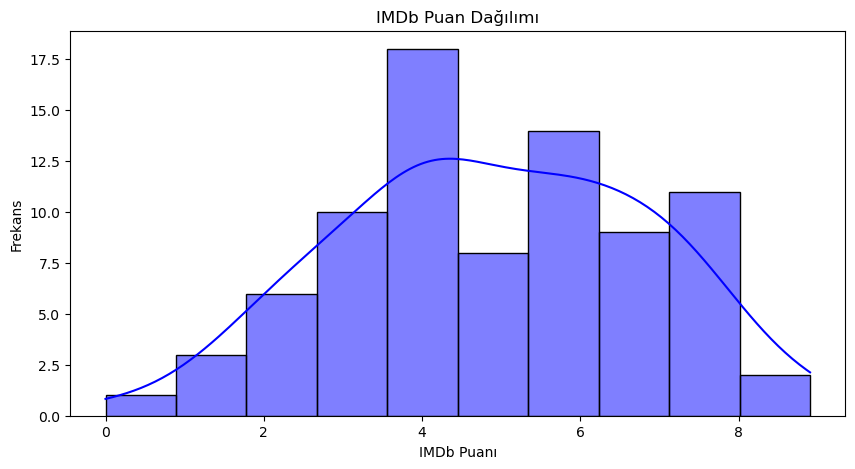

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df["IMDB"], bins=10, kde=True, color="blue")
plt.title("IMDb Puan Dağılımı")
plt.xlabel("IMDb Puanı")
plt.ylabel("Frekans")
plt.show()


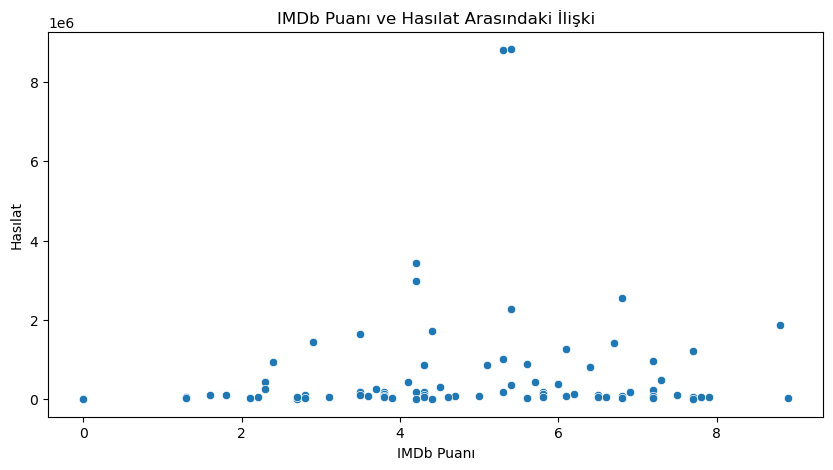

In [19]:
# Scatter plot (IMDb puanı vs Hasılat)
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["IMDB"], y=df["Hasilat"])
plt.title("IMDb Puanı ve Hasılat Arasındaki İlişki")
plt.xlabel("IMDb Puanı")
plt.ylabel("Hasılat")
plt.show()


In [21]:
correlation = df["IMDB"].corr(df["Hasilat"])
print("Korelasyon Katsayısı: ", correlation)


Korelasyon Katsayısı:  0.08051359602181465


In [ ]:
#IMDb puanı ile hasılat arasında çok zayıf bir pozitif ilişki var

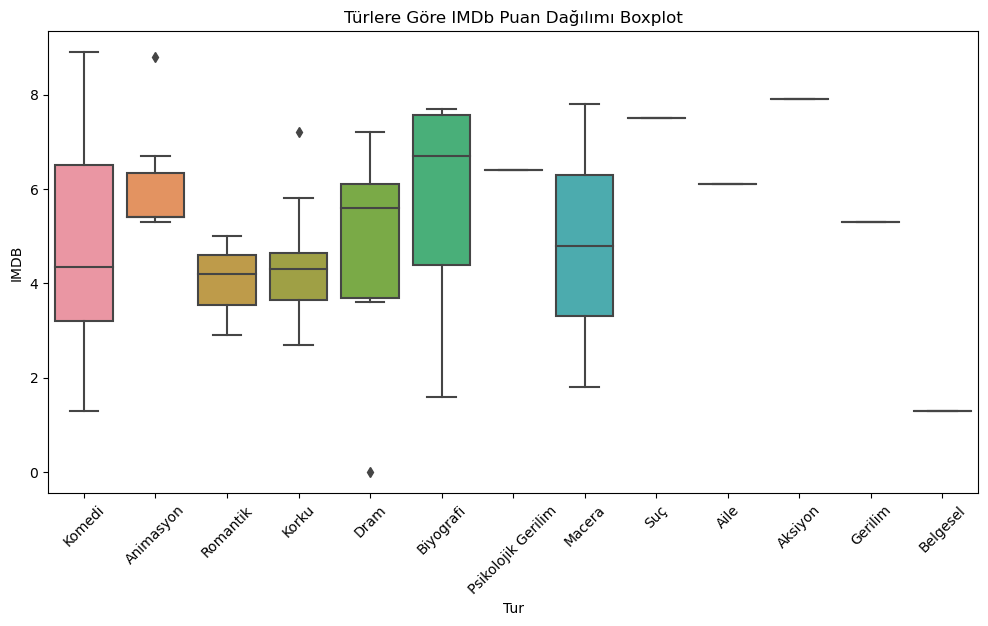

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Tur", y="IMDB", data=df)
plt.xticks(rotation=45)
plt.title("Türlere Göre IMDb Puan Dağılımı Boxplot")
plt.show()


In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df_clean = df.dropna(subset=["Hasilat"])

X = df_clean[["IMDB"]] 
y = df_clean["Hasilat"]  

model = LinearRegression()
model.fit(X, y)

hasilat_tahmini = model.predict(pd.DataFrame([[7]], columns=["IMDB"]))
print(f"IMDb puanı 7 olan bir film için hasılat tahmini: {hasilat_tahmini[0]:.2f} $")



IMDb puanı 7 olan bir film için hasılat tahmini: 788916.72 $


            Hasilat       IMDB
count  8.100000e+01  82.000000
mean   6.599456e+05   4.896341
std    1.484897e+06   1.928439
min    0.000000e+00   0.000000
25%    5.323800e+04   3.625000
50%    1.191680e+05   4.850000
75%    4.747360e+05   6.475000
max    8.824101e+06   8.900000


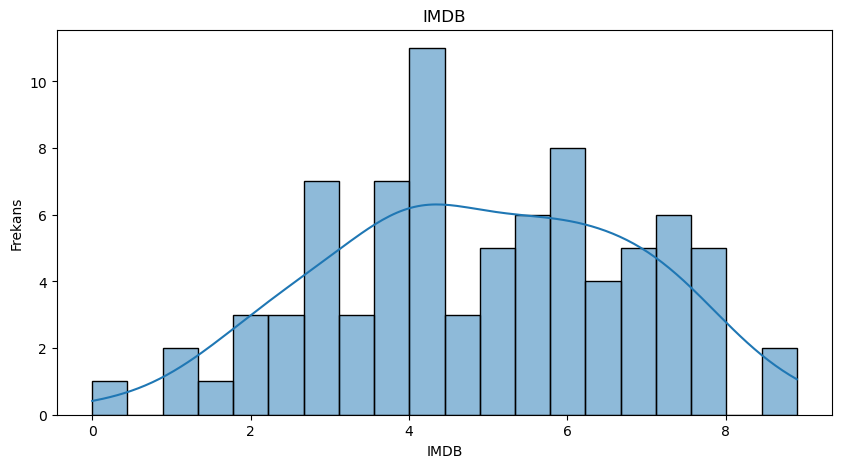

En yüksek hasılat yapan filmler:
                        Film    Hasilat  IMDB
1  Rafadan Tayfa: Hayrimatör  8824101.0   5.4
2                     Lohusa  8809952.0   5.3
3             3391 Kilometre  3424225.0   4.2
4                     Siccin  2975473.0   4.2
6   İllegal Hayatlar: Meclis  2563443.0   6.8
En düşük hasılat yapan filmler:
                 Film    Hasilat  IMDB
81        Sadık Ahmet      0.000   7.7
51           Hannas 2     79.112   2.7
78          Filme Gel   9765.000   4.2
77        Hükümet Bey  12096.000   4.4
76  Sırrını Biliyorum  17024.000   0.0


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

print(df.describe())  

plt.figure(figsize=(10,5))
sns.histplot(df["IMDB"], bins=20, kde=True)
plt.title("IMDB")
plt.xlabel("IMDB")
plt.ylabel("Frekans")
plt.show()

print("En yüksek hasılat yapan filmler:")
print(df.nlargest(5, "Hasilat")[["Film", "Hasilat", "IMDB"]])

print("En düşük hasılat yapan filmler:")
print(df.nsmallest(5, "Hasilat")[["Film", "Hasilat", "IMDB"]])


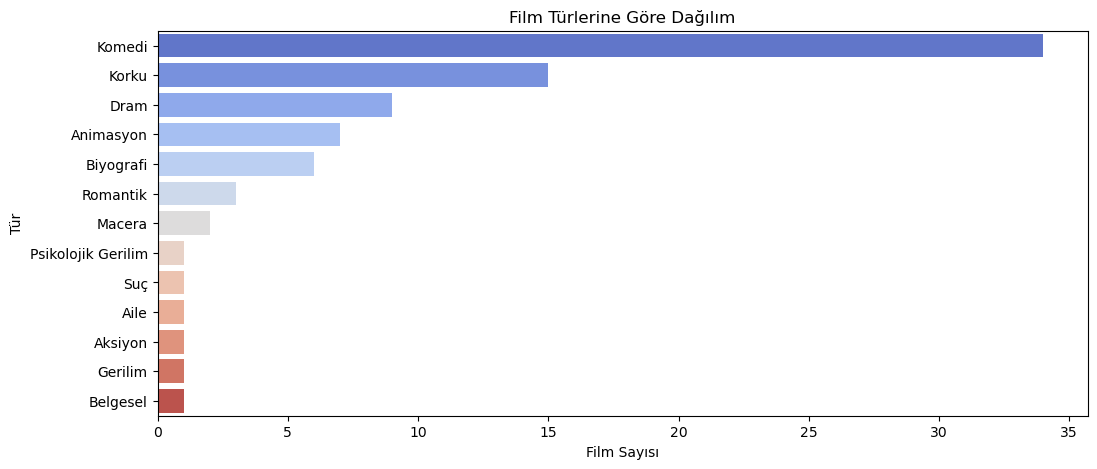

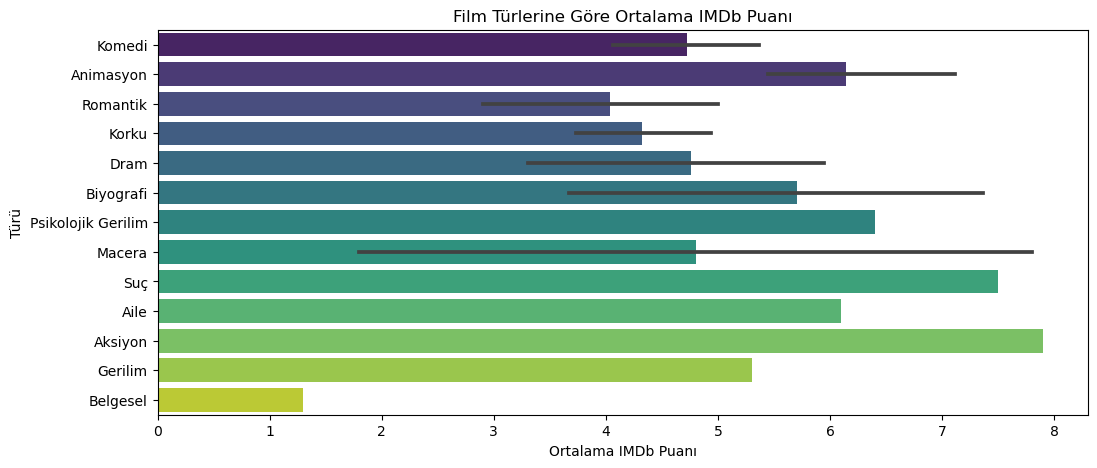

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["Tur"], order=df["Tur"].value_counts().index, palette="coolwarm")
plt.title("Film Türlerine Göre Dağılım")
plt.xlabel("Film Sayısı")
plt.ylabel("Tür")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(y=df["Tur"], x=df["IMDB"], estimator=lambda x: sum(x)/len(x), palette="viridis")
plt.title("Film Türlerine Göre Ortalama IMDb Puanı")
plt.xlabel("Ortalama IMDb Puanı")
plt.ylabel("Türü")
plt.show()

Yonetmen
Bilal Kalyoncu         3
Kamil Çetin            2
Hande Türkel           2
Selçuk Aydemir         2
Mustafa Miraç Kaya     2
H. Sinan Güngör        2
Deniz Enyüksek         2
Gökhan Ari             2
Tuğçe Soysop           1
Süleyman Mert Demir    1
Name: count, dtype: int64


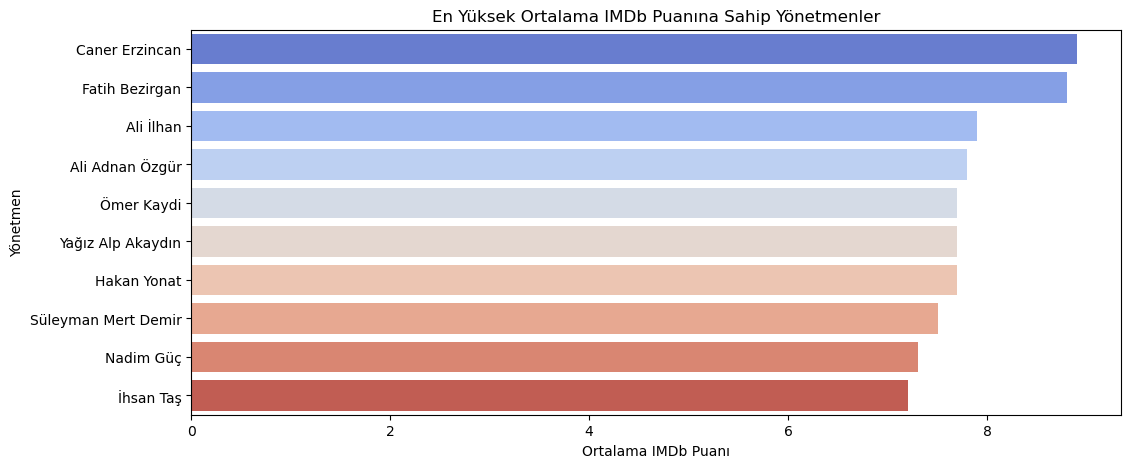

In [35]:
print(df["Yonetmen"].value_counts().head(10))

df_yonetmen = df.groupby("Yonetmen")["IMDB"].mean().reset_index()
df_yonetmen = df_yonetmen.sort_values(by="IMDB", ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(y=df_yonetmen["Yonetmen"].head(10), x=df_yonetmen["IMDB"].head(10), palette="coolwarm")
plt.title("En Yüksek Ortalama IMDb Puanına Sahip Yönetmenler")
plt.xlabel("Ortalama IMDb Puanı")
plt.ylabel("Yönetmen")
plt.show()

Ortalama Hasılat: 659945.6186666667


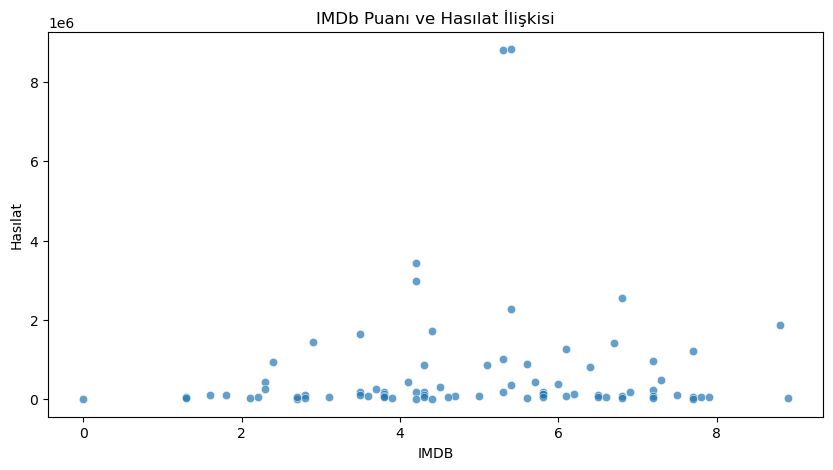

In [36]:
ortalama_hasilat = df["Hasilat"].mean()
print(f"Ortalama Hasılat: {ortalama_hasilat}")

plt.figure(figsize=(10,5))
sns.scatterplot(x=df["IMDB"], y=df["Hasilat"], alpha=0.7)
plt.title("IMDb Puanı ve Hasılat İlişkisi")
plt.xlabel("IMDB")
plt.ylabel("Hasılat")
plt.show()


In [ ]:
# Ortalama hasılat
# IMDb puanı yüksek olan filmler daha fazla mı kazanıyor--> Zayıf korelasyon

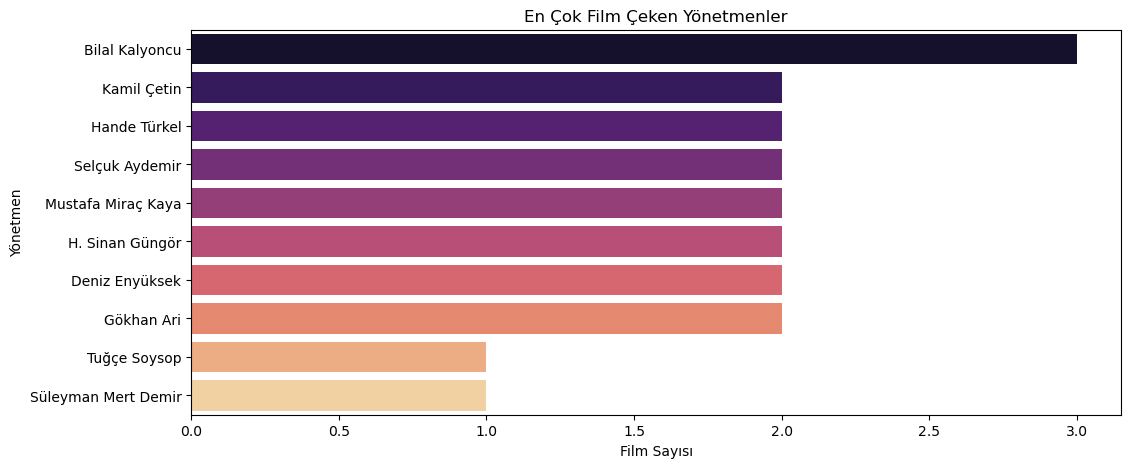

In [37]:
yonetmen_sayisi = df["Yonetmen"].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(y=yonetmen_sayisi.index, x=yonetmen_sayisi.values, palette="magma")
plt.title("En Çok Film Çeken Yönetmenler")
plt.xlabel("Film Sayısı")
plt.ylabel("Yönetmen")
plt.show()


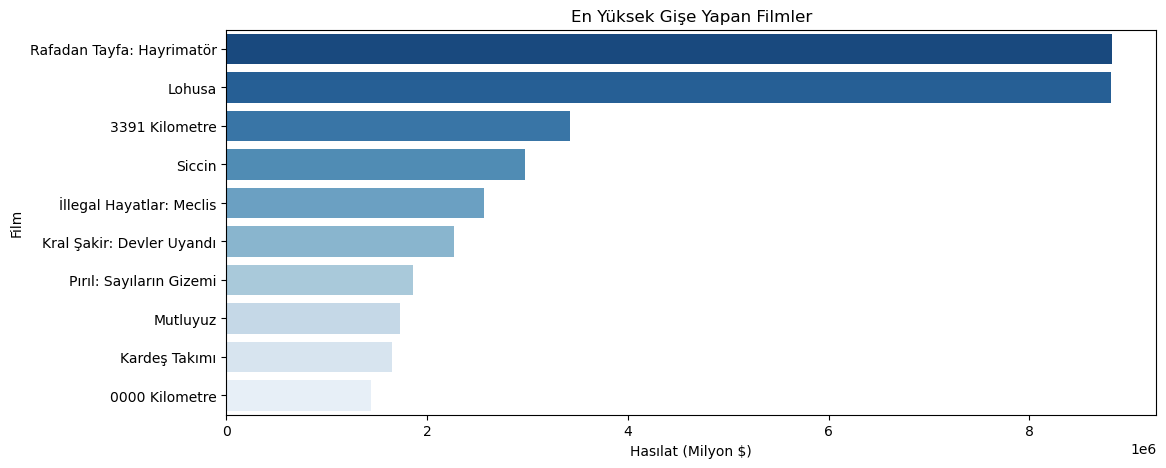

In [39]:
en_yuksek = df.nlargest(10, "Hasilat")
en_dusuk = df.nsmallest(10, "Hasilat")

plt.figure(figsize=(12,5))
sns.barplot(y=en_yuksek["Film"], x=en_yuksek["Hasilat"], palette="Blues_r")
plt.title("En Yüksek Gişe Yapan Filmler")
plt.xlabel("Hasılat (Milyon $)")
plt.ylabel("Film")
plt.show()


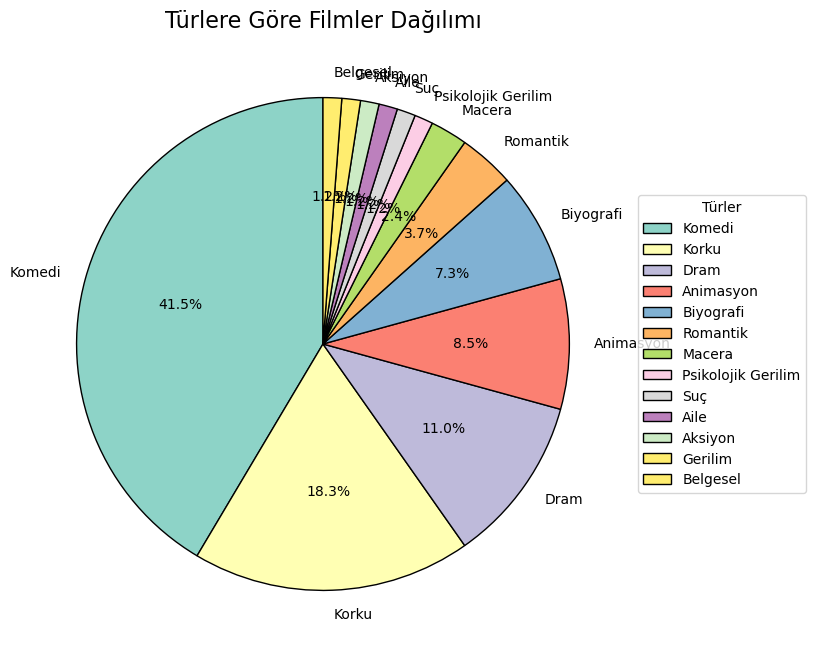

In [40]:
df = pd.read_excel("filmturk.xlsx", engine="openpyxl")

genre_counts = df['Tur'].value_counts()

colors = plt.cm.Set3(range(len(genre_counts)))

fig, ax = plt.subplots(figsize=(14, 8))

ax.pie(genre_counts, 
       labels=genre_counts.index, 
       autopct='%1.1f%%', 
       startangle=90, 
       colors=colors, 
       wedgeprops={'edgecolor': 'black'}, 
       explode=[0.1 if i == genre_counts.idxmax() else 0 for i in range(len(genre_counts))])  # En büyük dilimi patlat

plt.title('Türlere Göre Filmler Dağılımı', fontsize=16)

plt.ylabel('')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Türler', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

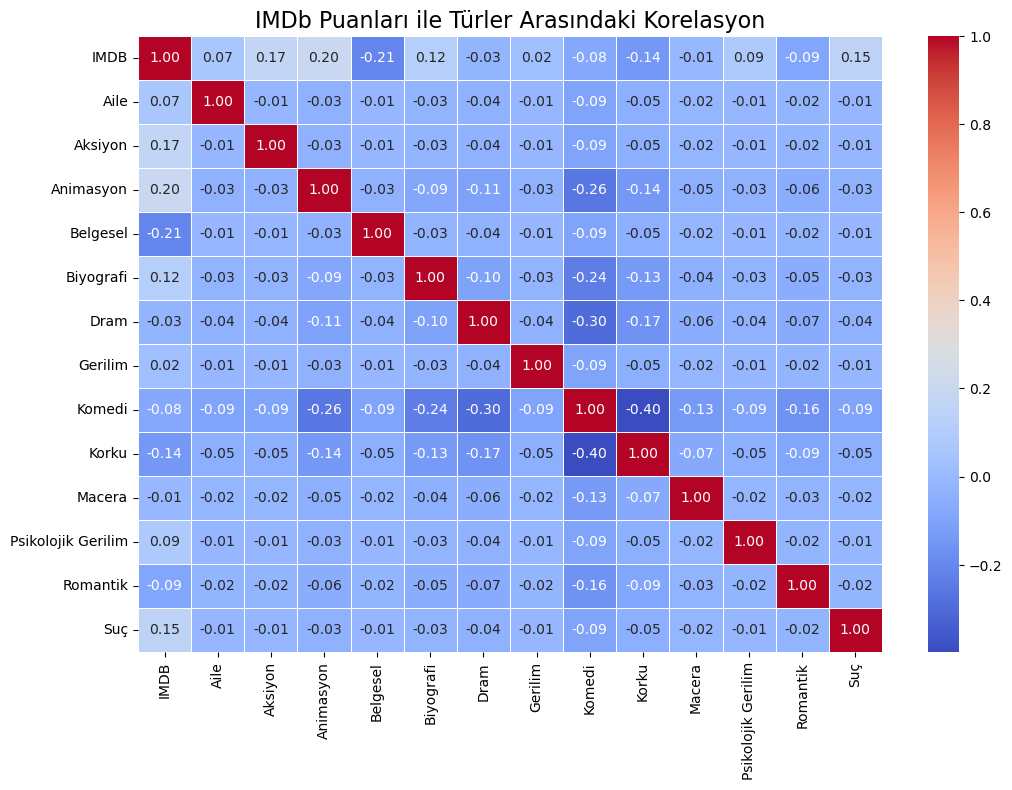

In [42]:
genre_dummies = df['Tur'].str.get_dummies(sep=', ')  
df_genres = pd.concat([df['IMDB'], genre_dummies], axis=1)

correlation = df_genres.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('IMDb Puanları ile Türler Arasındaki Korelasyon', fontsize=16)
plt.show()


In [ ]:
#IMDb puanları ile film türleri arasında genel olarak zayıf bir korelasyon 